# Utils per Test

Dimensioni dell'immagine originale (778, 1075, 3)
Dimensioni dell'immagine con np.resize (778, 1074, 3)
Dimensioni dell'immagine con rescale (770, 1064, 3)
Dimensioni dell'immagine con resize (770, 1064, 3)
Dimensioni dell'immagine con downscale_local_mean (778, 1075, 3)


Text(0.5, 1.0, 'downscale_local_mean')

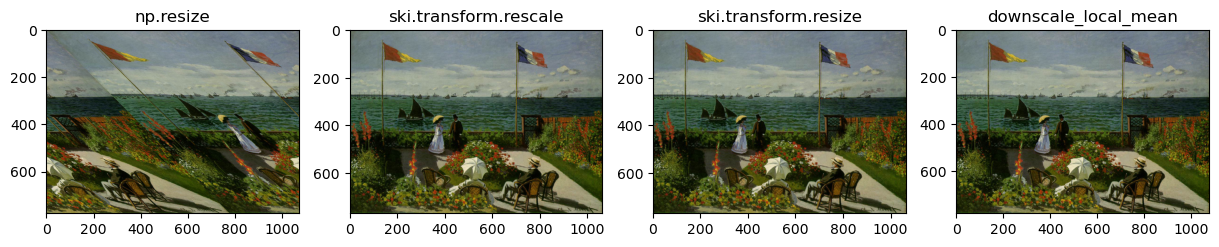

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image

garden = np.array(Image.open('images/monet_adresse.jpg')) # Legge l'immagine
m,n = garden[:,:,0].shape

print('Dimensioni dell\'immagine originale', garden.shape)

resized_garden_numpy = np.resize(garden, [m, n-1, 3]) # Non una buona rappresentazione del resize
print('Dimensioni dell\'immagine con np.resize', resized_garden_numpy.shape)

resized_garden_rescale = ski.transform.rescale(garden, 0.99, anti_aliasing = False, channel_axis=2) # Rescale
resized_garden_rescale = ski.util.img_as_ubyte(resized_garden_rescale)
print('Dimensioni dell\'immagine con rescale', resized_garden_rescale.shape)

resized_garden_resize = ski.transform.resize(garden, (garden.shape[0] // 1.01, garden.shape[1] // 1.01)) # Resize
resized_garden_resize = ski.util.img_as_ubyte(resized_garden_resize)
print('Dimensioni dell\'immagine con resize', resized_garden_resize.shape)

resized_garden_downscale = ski.transform.downscale_local_mean(garden, (1, 1, 1)) # Downscale - modifica l'aspect ratio
print('Dimensioni dell\'immagine con downscale_local_mean', resized_garden_downscale.shape)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
ax = axes.ravel()

ax[0].imshow(resized_garden_numpy.astype(np.uint8))
ax[0].set_title('np.resize')

ax[1].imshow(resized_garden_rescale.astype(np.uint8))
ax[1].set_title('ski.transform.rescale')

ax[2].imshow(resized_garden_resize.astype(np.uint8))
ax[2].set_title('ski.transform.resize')

ax[3].imshow(resized_garden_downscale.astype(np.uint8))
ax[3].set_title('downscale_local_mean')


 CANALE DEL ROSSO: 

[[ nan  nan  nan ...  nan  nan  nan]
 [111.  nan 105. ...  nan 108.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ 58.  nan  33. ...  nan 157.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ 60.  nan  50. ...  nan 149.  nan]]

 CANALE DEL VERDE: 

[[122.  nan 116. ...  nan 110.  nan]
 [ nan 119.  nan ... 113.  nan 111.]
 [122.  nan 115. ...  nan 119.  nan]
 ...
 [ nan  72.  nan ... 126.  nan 129.]
 [ 82.  nan  69. ...  nan 131.  nan]
 [ nan  79.  nan ... 139.  nan 136.]]

 CANALE DEL BLU: 

[[ nan 102.  nan ... 121.  nan 112.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan 102.  nan ... 112.  nan 119.]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  12.  nan ...  91.  nan  85.]
 [ nan  nan  nan ...  nan  nan  nan]]




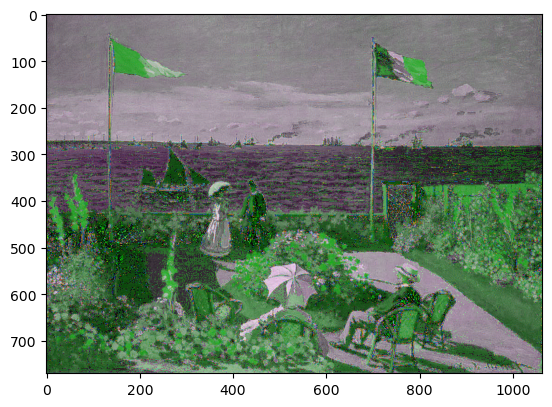

In [7]:
# Bayer Pattern GBRG - Rescale

m,n = resized_garden_rescale[:,:,0].shape # Considero le nuove dimensioni

Red_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,0].shape)
Red_Inpaint[1:m:2, 0:n-1:2] = resized_garden_rescale[1:m:2, 0:n-1:2, 0]

Green_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,1].shape)
Green_Inpaint[0:m-1:2, 0:n-1:2] = resized_garden_rescale[0:m-1:2, 0:n-1:2, 1]
Green_Inpaint[1:m:2, 1:n:2] = resized_garden_rescale[1:m:2, 1:n:2, 1]

Blue_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,2].shape)
Blue_Inpaint[0:m:2, 1:n:2] = resized_garden_rescale[0:m:2, 1:n:2, 2]

print('\n CANALE DEL ROSSO: \n')
print(Red_Inpaint)
print('\n CANALE DEL VERDE: \n')
print(Green_Inpaint)
print('\n CANALE DEL BLU: \n')
print(Blue_Inpaint)
print('\n')


# Demosaicizzazione con Pattern GBRG

bayer = np.empty((m, n), np.uint8)
# strided slicing for this pattern: 
# G B
# R G 
bayer[0::2, 0::2] = Green_Inpaint[0::2, 0::2] # top left 
bayer[0::2, 1::2] = Blue_Inpaint[0::2, 1::2]  # top right
bayer[1::2, 0::2] = Red_Inpaint[1::2, 0::2]   # bottom left
bayer[1::2, 1::2] = Green_Inpaint[1::2, 1::2] # bottom right

Gdemosaic = demosaic_simple_naive(bayer) # L'algoritmo si basa sul pattern RGGB?

plt.imshow(Gdemosaic.astype(np.uint8))

In [8]:
# Bayer Pattern RGGB - Rescale

m,n = resized_garden_rescale[:,:,0].shape # Considero le nuove dimensioni

Red_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,0].shape)
Red_Inpaint[0:m-1:2, 0:n-1:2] = resized_garden_rescale[0:m-1:2, 0:n-1:2, 0]

Green_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,1].shape)
Green_Inpaint[0:m:2, 1:n:2] = resized_garden_rescale[0:m:2, 1:n:2, 1]
Green_Inpaint[1:m:2, 0:n-1:2] = resized_garden_rescale[1:m:2, 0:n-1:2, 1]

Blue_Inpaint = np.nan *np.ones(resized_garden_rescale[:,:,2].shape)
Blue_Inpaint[1:m:2, 1:n:2] = resized_garden_rescale[1:m:2, 1:n:2, 2]

print('\n CANALE DEL ROSSO: \n')
print(Red_Inpaint)
print('\n CANALE DEL VERDE: \n')
print(Green_Inpaint)
print('\n CANALE DEL BLU: \n')
print(Blue_Inpaint)
print('\n')

Gdemosaic = demosaic_simple_naive(bayer) # L'algoritmo si basa sul pattern RGGB?

plt.imshow(Gdemosaic.astype(np.uint8))


 CANALE DEL ROSSO: 

[[111.  nan 105. ...  nan 111.  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [111.  nan 104. ...  nan 120.  nan]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ 51.  nan  39. ...  nan 143.  nan]
 [ nan  nan  nan ...  nan  nan  nan]]

 CANALE DEL VERDE: 

[[ nan 119.  nan ... 123.  nan 114.]
 [122.  nan 116. ...  nan 107.  nan]
 [ nan 119.  nan ... 117.  nan 124.]
 ...
 [ 86.  nan  59. ...  nan 144.  nan]
 [ nan  66.  nan ... 133.  nan 130.]
 [ 94.  nan  83. ...  nan 138.  nan]]

 CANALE DEL BLU: 

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan 102.  nan ... 109.  nan 107.]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  21.  nan ...  87.  nan  85.]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  22.  nan ...  96.  nan  90.]]




Text(0.5, 1.0, 'Demosaicking')

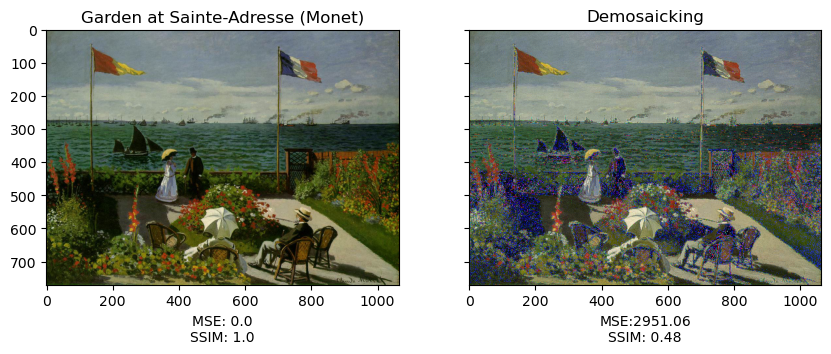

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

# Demosaicizzazione con Pattern GBRG

bayer = np.empty((m, n), np.uint8)

bayer[0::2, 0::2] = Red_Inpaint[0::2, 0::2]   # top left 
bayer[0::2, 1::2] = Green_Inpaint[0::2, 1::2] # top right
bayer[1::2, 0::2] = Green_Inpaint[1::2, 0::2] # bottom left
bayer[1::2, 1::2] = Blue_Inpaint[1::2, 1::2]  # bottom right

Gdemosaic = demosaic_simple_naive(bayer) 

mse_original = mean_squared_error(resized_garden_rescale, resized_garden_rescale)
ssim_original = ssim(resized_garden_rescale, resized_garden_rescale,
                     data_range = resized_garden_rescale.max() - resized_garden_rescale.min(), channel_axis=2)

mse_demosaic = mean_squared_error(resized_garden_rescale, Gdemosaic)
ssim_demosaic = ssim(resized_garden_rescale, Gdemosaic, data_range = Gdemosaic.max() - Gdemosaic.min(), channel_axis=2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(resized_garden_rescale.astype(np.uint8))
ax[0].set_xlabel('MSE: ' + str(round(mse_original, 2)) + '\n' + 'SSIM: ' + str(round(ssim_original, 2)))
ax[0].set_title('Garden at Sainte-Adresse (Monet)')

ax[1].imshow(Gdemosaic.astype(np.uint8))
ax[1].set_xlabel('MSE:' + str(round(mse_demosaic, 2)) + '\n' + 'SSIM: ' + str(round(ssim_demosaic, 2)))
ax[1].set_title('Demosaicking')

# Costruzione della SVD troncata

Rango della matrice di partenza: 778
Approssimazione SVD compatta: (778, 1075)
Errore relativo pari a: 1.0397595889479518e-14
Approssimazione SVD Troncata alla 100 iterazione: (778, 1075)
Errore relativo pari a: 0.009937014928690991


Text(0.5, 1.0, 'SVD Troncata al 100 valore')

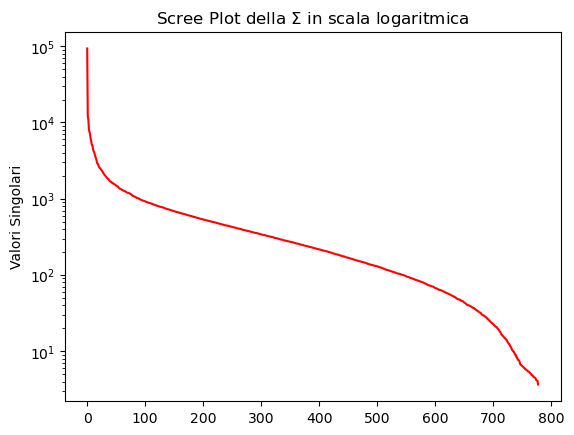

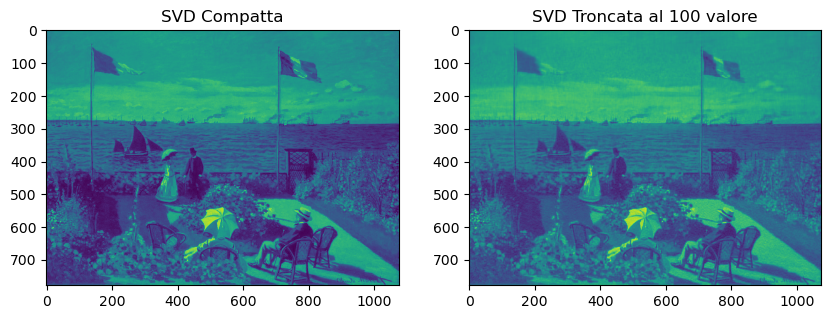

In [10]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from PIL import Image

garden = np.array(Image.open('images/monet_adresse.jpg'))
svd_garden = garden[:,:,1]

U, S, V = linalg.svd(svd_garden)
plt.semilogy(S, '-r')
plt.ylabel('Valori Singolari')
plt.title('Scree Plot della $\Sigma$ in scala logaritmica')

# SVD Compatta
r = linalg.matrix_rank(svd_garden)
print('Rango della matrice di partenza:', r)

A_rank = U[:, 0:r] @ np.diag(S) @ V[0:r, :]

print('Approssimazione SVD compatta:', A_rank.shape)

print('Errore relativo pari a:', linalg.norm(svd_garden - A_rank, 2)/linalg.norm(svd_garden, 2))

# SVD Troncata
k = 1
A_k = U[:, 0:k] @ np.diag(S[0:k]) @ V[0:k, :]
# tol = 1e-6 # Tolleranza troppo stretta
tol = 1e-2

while(linalg.norm(svd_garden - A_k, 2)/linalg.norm(svd_garden, 2) > tol and k != r):
    A_k = U[:, 0:k] @ np.diag(S[0:k]) @ V[0:k, :]
    k += 1
    
print('Approssimazione SVD Troncata alla', k, 'iterazione:', A_k.shape)
    
print('Errore relativo pari a:', linalg.norm(svd_garden - A_k, 2)/linalg.norm(svd_garden, 2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(A_rank)
ax[0].set_title('SVD Compatta')

ax[1].imshow(A_k)
ax[1].set_title('SVD Troncata al ' + str(k) + ' valore')
